# Визуализация массивов numpy

## Изображения как массивы
В компьютерной графике используется так называемое "растровое" представление изображения, которое представляет собой не что иное как матрицу "пикселей", каждый элемент которой является числовым кодом цвета. Массив numpy, имеющий подходящие размеры и подходящий тип данных, может быть визуализирован непосредственно как растровое изображение. Посмотрим простой пример.

In [1]:
import numpy as np
gradient = np.tile(np.arange(0, 256, dtype='uint8'), (255, 1))
gradient

array([[  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       ...,
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255],
       [  0,   1,   2, ..., 253, 254, 255]], dtype=uint8)

Стоит обратить внимание на тип данных - uint8. Это целое беззнаковое 8-битное число. Проще говоря, просто 1 байт. Именно такой тип используется для кодирования цвета (хотя библиотека matplotlib позволяет визуализировать массивы с любыми типами данных, но для некоторых других целей стоит использовать тип uint8). О функции `np.tile` почитайте подробнее в документации.

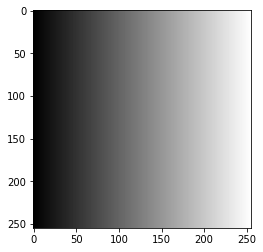

In [2]:
import matplotlib.pyplot as plt
plt.imshow(gradient, cmap='gray', vmin=0, vmax=255)
plt.show()

Визуализация массива в matplotlib выполняется с помощью функции imshow. Аргументы `cmap='gray', vmin=0, vmax=255` говорят о том, что должны использоваться оттенки серого со значениями от 0 (черный) до 255 (белый).

**Упраженение №1**

Попробуйте поэкспериментировать с этими параметрами. Посмотреть встроенные цветовые схемы matplotlib можно здесь: https://matplotlib.org/stable/tutorials/colors/colormaps.html

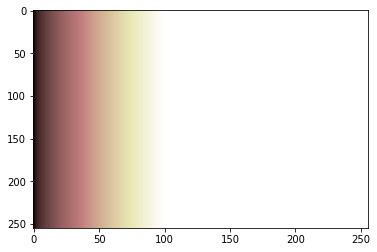

In [17]:
import matplotlib.pyplot as plt
plt.imshow(gradient, aspect='auto', cmap='pink', vmin=0., vmax=100.)
plt.show()

## Загрузка растрового изображения в массив
Воспользовавшись библиотекой pillow можно загрузить в массив растровое изображение.

In [22]:
from PIL import Image
img = Image.open('flowers.JPG')
img_arr = np.array(img)

In [23]:
img_arr.shape

(1182, 1773, 3)

Мы получили 3-мерный массив. Первые две оси - это высота и ширина изображения, третья ось содержит три компонента цвета - красный, синий и зеленый. Отобразить изображение можно тем же способом.

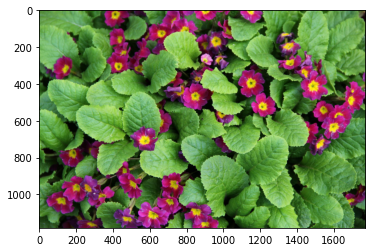

In [24]:
plt.imshow(img_arr)
plt.show()

Поскольку в данном случае мы имеем цветное изображение, параметр `cmap` указывать не нужно.

## Обработка изображений

Попробуем применить к изображению (или, что то же самое, к массиву) некоторые из известных нам операций. Например, усреднение по третьей оси (т.е. по оси цвета) дает нам черно-белое изображение.

ValueError: 'grey' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

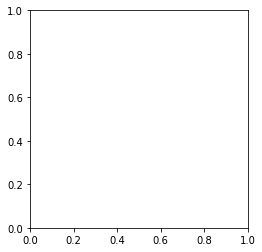

In [31]:
plt.imshow(img_arr.mean(axis=2), cmap='grey')
plt.show()

Можно визуализировать отдельно красный, зеленый и синий компоненты изображения.

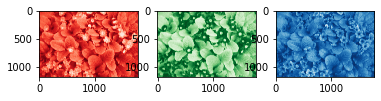

In [32]:
ax1 = plt.subplot(131)
ax1.imshow(img_arr[:, :, 0], cmap='Reds_r')
ax2 = plt.subplot(132)
ax2.imshow(img_arr[:, :, 1], cmap='Greens_r')
ax3 = plt.subplot(133)
ax3.imshow(img_arr[:, :, 2], cmap='Blues_r')
plt.show()

С помощью срезов и транспонирования можно переворачивать изображение (при транспонировании нужно правильно указать оси, чтобы цвет остался без изменений).

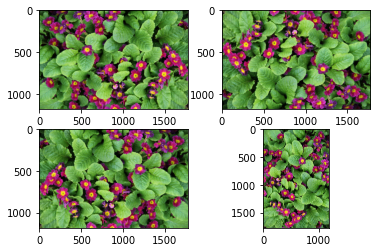

In [33]:
ax1 = plt.subplot(221)
ax1.imshow(img_arr[::-1])
ax2 = plt.subplot(222)
ax2.imshow(img_arr[:, ::-1])
ax3 = plt.subplot(223)
ax3.imshow(img_arr[::-1, ::-1])
ax3 = plt.subplot(224)
ax3.imshow(np.transpose(img_arr, (1, 0, 2)))
plt.show()

С помощью некоторых математических функций можно производить обработку изображения. Например, увеличить красный компонент (преобразования типов необходимы, чтобы не выйти за пределы допустимых значений байта и не получить некрасивые искажения).

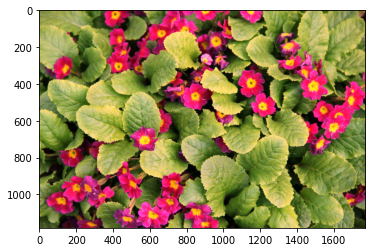

In [34]:
modified = img_arr.astype('float')
modified[:, :, 0] *= 1.5
modified[modified > 255] = 255
modified = modified.astype('uint8')
plt.imshow(modified)
plt.show()

Здесь стоит немного пояснить третью строчку. При применении к массивам логических операций мы получаем массив такого же размера, как исходный, но содержащий булевы значения.

In [35]:
a = np.array([1, 2, 3, 4])
a > 2

array([False, False,  True,  True])

С другой стороны в качестве "индекса" для среза мы можем использовать массив булевых значений, который означает, какие элементы из исходного массива войдут в срез, а какие - нет.

In [36]:
a[[True, False, True, False]]

array([1, 3])

Соединяя эти два факта вместе мы получаем очень удобный способ фильтрации массива: в качестве индекса внутри квадратных скобок пишем логическое выражение, которое будет преобразовано в массив булевых значений, которые в свою очередь будут использваны в качестве индекса. Например, выберем из массива только четные элементы:

In [ ]:
a[a % 2 == 0]

Вернемся к нашему примеру. Строка `modified[modified > 255] = 255` означает, что те элементы массива, значение которых оказалось больше, чем 255 (максимальное значение в 1 байте), мы ограничиваем значением 255, чтобы избежать переполнения.

**Упражнение №2**

Поэкспериментируйте с этим примером. Попробуйте другие коэфициенты, другие компоненты цвета и другие математические операции.

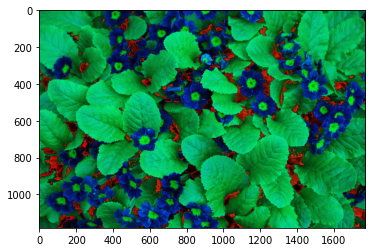

In [70]:
modified = img_arr.astype('float')
modified[:, :, 0] *= 15
modified[modified > 255] = 5
modified = modified.astype('uint8')
plt.imshow(modified)
plt.show()


## Размытие изображения (задача)
Перед вами стоит задача написать функцию размытия изображений. Размытие изображения - частный случай операции "свертки" (или "конволюции"), которая часто применяется и в других задачах. Не вникая глубоко в математические детали, можно сказать, что суть этой операции в том, что элементы исходного массива суммируются со своими соседями с определенным весом. Для большей ясности начнем с обычного 1-мерного массива. Пусть у нас есть массив (для простоты пусть в нем будет большая часть нулей и только один ненулевой элемент в середине), и мы хотим просто усреднить каждое значение с его ближайшими соседями. Тогда массив весов будет состоять из трех единиц (чтобы исходная сумма осталась неизменной, поделим их на 3). Воспользуемся функцией `convolve1d` из библиотеки `scipy`.

In [77]:
import scipy
import scipy.ndimage

In [78]:
a = np.array([0, 0, 10, 0, 0], dtype=float)
w = np.array([1/3, 1/3, 1/3])
scipy.ndimage.convolve1d(a, w)

array([0.        , 3.33333333, 3.33333333, 3.33333333, 0.        ])

Попробуем взять другой массив весов. Например, пусть исходное значение входит в среднее с несколько большим весом, чем его соседи.

In [79]:
a = np.array([0, 0, 10, 0, 0], dtype=float)
w = np.array([1/4, 1/2, 1/4])
scipy.ndimage.convolve1d(a, w)

array([0. , 2.5, 5. , 2.5, 0. ])

Можно сделать свертку и большего размера.

In [80]:
a = np.array([0, 0, 0, 10, 0, 0, 0], dtype=float)
w = np.array([1/12, 1/6, 1/2, 1/6, 1/12])
scipy.ndimage.convolve1d(a, w)

array([0.        , 0.83333333, 1.66666667, 5.        , 1.66666667,
       0.83333333, 0.        ])

In [ ]:
Аналогично делаются и двумерные свёртки.

In [81]:
a = np.zeros((5, 5))
a[2, 2] = 10
a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [122]:
A= np.array([[1, 2, 1, 1, 1], [7, 2, 4, 5, 6], [5, 2, 1, 5, 6], [7, 2, 4, 5, 6], [7, 2, 4, 5, 6]])
print(((A.shape[0])+2, (A.shape[1]+2)))
N=np.zeros(((A.shape[0])+2, (A.shape[1]+2)))
print(N)

N[1:(N.shape[0]-1),1:(N.shape[1]-1)]=A
print(N)
def pad(A, K):
    N=np.zeros(((A.shape[0])+2, (A.shape[1]+2)))
    N[1:(N.shape[0]-1),1:(N.shape[1]-1)]=A
    print(N)
    



(7, 7)
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 2. 1. 1. 1. 0.]
 [0. 7. 2. 4. 5. 6. 0.]
 [0. 5. 2. 1. 5. 6. 0.]
 [0. 7. 2. 4. 5. 6. 0.]
 [0. 7. 2. 4. 5. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


**Упражнение №3**

Напишите функцию размытия изображения с заданной весовой матрицей. При этом не забудьте учесть следующие детали:
1. Функция должна корректно работать как с цветными, так и с черно-белыми изображениями.
2. Весовая матрица, возможно, нуждается в нормировке.
3. В итоговом изображении не должно быть переполнения однобайтного типа.

In [45]:
import numpy as np
A= np.array([[1, 2, 1,2,3], [7,2,4,3, 4], [5,2,1,5,7], [4,6,3,4,6], [5,2,1,5,7]])
print(A)
K=np.array([[1,2,3], [4,6,7], [5,3,4]])
print(K)
print((A.shape[0]-(((K.shape[0]+1)//2)+1)))
N=np.zeros(((A.shape[0])+(((K.shape[0]+1)//2)*2), A.shape[1]+((K.shape[1]+1)//2)*2))
print(N)
print(N.shape[1]-((K.shape[1]+1)//2))
print(((N.shape[0]-(K.shape[0]+1)//2)))
def pad(A,K):
    N=np.zeros(((A.shape[0])+(((K.shape[0]+1)//2)*2), A.shape[1]+((K.shape[1]+1)//2)*2)) #atritsa 0 kotoray budet (2r+3)*(2k+3)
    n=((K.shape[0]+1)//2)
    k=((N.shape[0]-(K.shape[0]+1)//2))
    j=((K.shape[1]+1)//2)
    p=(N.shape[1]-((K.shape[1]+1)//2))
    N[n:k,j:p]=A
    return N
pad(A,K)



[[1 2 1 2 3]
 [7 2 4 3 4]
 [5 2 1 5 7]
 [4 6 3 4 6]
 [5 2 1 5 7]]
[[1 2 3]
 [4 6 7]
 [5 3 4]]
2
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
7
7


array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 1., 2., 3., 0., 0.],
       [0., 0., 7., 2., 4., 3., 4., 0., 0.],
       [0., 0., 5., 2., 1., 5., 7., 0., 0.],
       [0., 0., 4., 6., 3., 4., 6., 0., 0.],
       [0., 0., 5., 2., 1., 5., 7., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Упражнение №4**

Напишите функцию гауссова размытия. Функция принимает на вход дисперсию размытия (сигму), генерирует весовую матрицу и вызывает функцию из предыдущего задания.

Функция гауссова распределения (нормировочный множитель можно опустить, поскольку матрица в любом случае будет нормироваться потом):

$$
f(x) = e^{-\frac{1}{2}(\frac{x}{\sigma})^2}
$$
где `x` - расстояние до центра.

Подумайте, какого размера должна быть весовая матрица.

In [ ]:
def gaussian_blur(img_array, sigma):
    """
    Выполняет гауссово размытие с заданной дисперсией
    """
    pass

## Генерирование изображений

В первом примере мы уже видели, как сгенерировать простой градиент. Давайте попробуем что-нибудь посложнее.

In [ ]:
x = np.linspace(-20, 20, 1000)
y = x[::-1].reshape((-1, 1))
dist = np.sqrt(x ** 2 + y ** 2)
img = np.sin(dist) * np.exp(-dist * 0.2)
plt.imshow(img)
plt.show()

Здесь в переменной `x` мы создали линейную последовательность точек по оси x, в переменной `y` - эту же последовательность, но расположенную вертикально (реверс сделан, чтобы ось y была направлена как обычно снизу вверх - строки в массивах нумеруются сверху вниз). Сложение двух массивов, один из которых представляет собой строку, а другой - столбец, дает матрицу попарных сумм их элементов.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[10],
              [20],
              [30]])
a + b

С помощью этого приема легко одной операцией посчитать функцию двух переменных на некотором участке пространства. В данном случае мы посчитали затухающий синус.

**Упражнение №5**
Изобразите функцию на диапазоне \[-3, 3]
$$
f(x, y) = x^2 + (y + 1 - \sqrt{|x|})^2 - 1
$$

Напоследок сделаем что-нибудь по-настоящему красивое. Например, множество Мандельброта. Напомним, что это множество точек `c` на комплексной плоскости такое, что последовательность
$$
z_{n} = z_{n-1}^2 + c
$$
задает ограниченную последовательность.

На практике можно вычислить несколько итераций (скажем, 100), и если значение всё ещё меньше 2, можно считать, что в этой точке последовательность ограничена.

Для начала создадим комплексную плоскость.

In [ ]:
re = np.linspace(-2, 2, 200)
im = np.linspace(-2, 2, 200).reshape((-1, 1))
c = re + im * 1j

Теперь посчитаем последотельность. Можете не обращать внимания на предупреждение о переполнении - в некоторых точках последовательность уже ушла в бесконечность.

In [ ]:
z = np.zeros((200, 200))
for i in range(100):
    z = z ** 2 + c

Наконец, изобразим получившееся множество.

In [ ]:
img = np.zeros((200, 200))
img[np.abs(z) < 2] = 255
plt.imshow(img)
plt.show()

**Упражнение №6**
Добавьте в это изображение оттенки в соответствии с тем, насколько быстро последовательность расходится в данной точке. Напишите функцию, в которой можно задать диапазон и количество точек ("качество" изображения).

In [ ]:
def mandelbrot(x_low, x_high, y_low, y_high, points_x, points_y):
    """
    Создает изображение множества Мандельброта в диапазоне по x от x_low до x_high,
    по y - от y_low до y_high с разрешением points_x*points_y
    """
    pass

**Упражнение №7 (дополнительное)**

Изобразите [множество Жюлиа](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%96%D1%8E%D0%BB%D0%B8%D0%B0).